<a href="https://colab.research.google.com/github/IsfaquethedataAnalyst/Data_Analyst/blob/main/Optimizing_FedEx_Delivery_Times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming the data is in a CSV file named 'fedex_data.csv'
df = pd.read_csv('fedex.csv')

# Convert date-time columns to datetime type
date_columns = ['Actual_Shipment_Time', 'Planned_Shipment_Time', 'Planned_Delivery_Time']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Calculate actual delivery time and delay
df['Actual_Delivery_Time'] = df['Actual_Shipment_Time'] + pd.to_timedelta(df['Planned_TimeofTravel'])
df['Delivery_Delay'] = (df['Actual_Delivery_Time'] - df['Planned_Delivery_Time']).dt.total_seconds() / 3600  # in hours

In [2]:
df

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status,Actual_Delivery_Time,Delivery_Delay
0,2008,1,3,4,1970-01-01 00:00:00.000002003,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000002225,WN,335,150.0,8.0,IAD,TPA,810.0,0.0,1970-01-01 00:00:00.000002153,-2.000000e-11
1,2008,1,3,4,1970-01-01 00:00:00.000000754,1970-01-01 00:00:00.000000735,1970-01-01 00:00:00.000001000,WN,3231,145.0,19.0,IAD,TPA,810.0,1.0,1970-01-01 00:00:00.000000899,-2.805556e-11
2,2008,1,3,4,1970-01-01 00:00:00.000000628,1970-01-01 00:00:00.000000620,1970-01-01 00:00:00.000000750,WN,448,90.0,8.0,IND,BWI,515.0,0.0,1970-01-01 00:00:00.000000718,-8.888889e-12
3,2008,1,3,4,1970-01-01 00:00:00.000000926,1970-01-01 00:00:00.000000930,1970-01-01 00:00:00.000001100,WN,1746,90.0,-4.0,IND,BWI,515.0,0.0,1970-01-01 00:00:00.000001016,-2.333333e-11
4,2008,1,3,4,1970-01-01 00:00:00.000001829,1970-01-01 00:00:00.000001755,1970-01-01 00:00:00.000001925,WN,3920,90.0,34.0,IND,BWI,515.0,1.0,1970-01-01 00:00:00.000001919,-1.666667e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120391,2008,1,5,6,1970-01-01 00:00:00.000000613,1970-01-01 00:00:00.000000615,1970-01-01 00:00:00.000000723,XE,2561,128.0,-2.0,TLH,IAH,658.0,0.0,1970-01-01 00:00:00.000000741,5.000000e-12
120392,2008,1,16,3,1970-01-01 00:00:00.000000900,1970-01-01 00:00:00.000000900,1970-01-01 00:00:00.000001032,XE,1273,92.0,0.0,EWR,IAD,213.0,0.0,1970-01-01 00:00:00.000000992,-1.111111e-11
120393,2008,1,26,6,1970-01-01 00:00:00.000001449,1970-01-01 00:00:00.000001450,1970-01-01 00:00:00.000001639,XE,2391,109.0,-1.0,EWR,DAY,533.0,0.0,1970-01-01 00:00:00.000001558,-2.250000e-11
120394,2008,1,18,5,1970-01-01 00:00:00.000001807,1970-01-01 00:00:00.000001659,1970-01-01 00:00:00.000001829,XE,1278,90.0,68.0,IAD,EWR,213.0,1.0,1970-01-01 00:00:00.000001897,1.888889e-11


           Year     Month     DayofMonth           Actual_Shipment_Time  \
count  120396.0  120396.0  120396.000000                         118871   
mean     2008.0       1.0      16.883443  1970-01-01 00:00:00.000001350   
min      2008.0       1.0       1.000000  1970-01-01 00:00:00.000000001   
25%      2008.0       1.0      10.000000  1970-01-01 00:00:00.000000940   
50%      2008.0       1.0      17.000000  1970-01-01 00:00:00.000001344   
75%      2008.0       1.0      24.000000  1970-01-01 00:00:00.000001739   
max      2008.0       1.0      31.000000  1970-01-01 00:00:00.000002400   
std         0.0       0.0       8.487073                            NaN   

               Planned_Shipment_Time          Planned_Delivery_Time  \
count                         120396                         120396   
mean   1970-01-01 00:00:00.000001337  1970-01-01 00:00:00.000001501   
min    1970-01-01 00:00:00.000000150  1970-01-01 00:00:00.000000005   
25%    1970-01-01 00:00:00.000000935  19

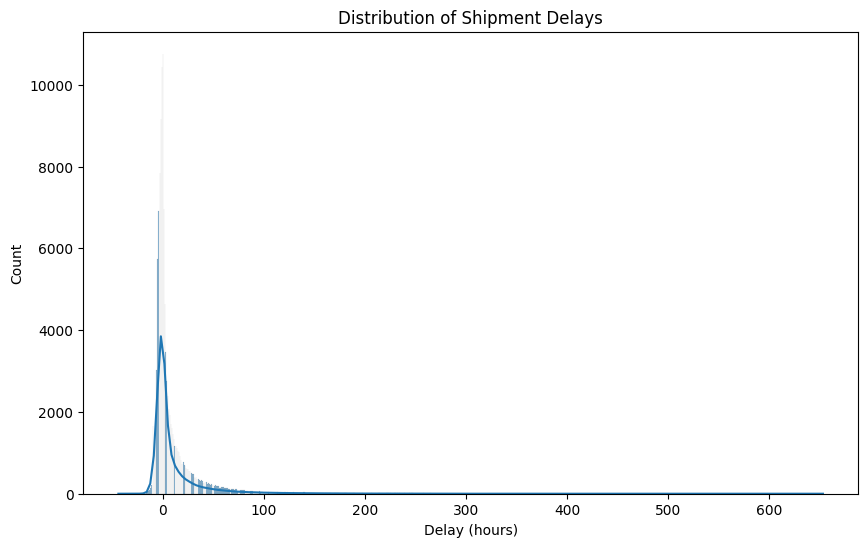

In [7]:
# Basic statistics
print(df.describe())

# Shipment delay analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Shipment_Delay'], kde=True)
plt.title('Distribution of Shipment Delays')
plt.xlabel('Delay (hours)')
plt.show()

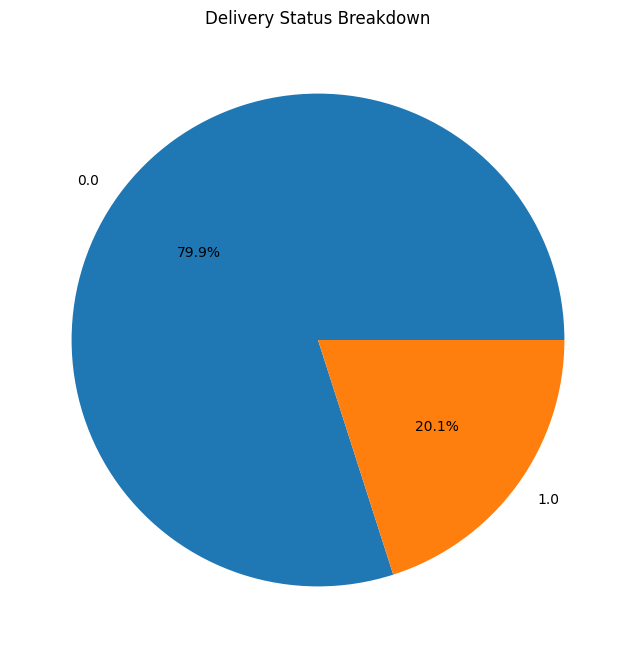

In [8]:
# Delivery status breakdown
delivery_status_counts = df['Delivery_Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%')
plt.title('Delivery Status Breakdown')
plt.show()

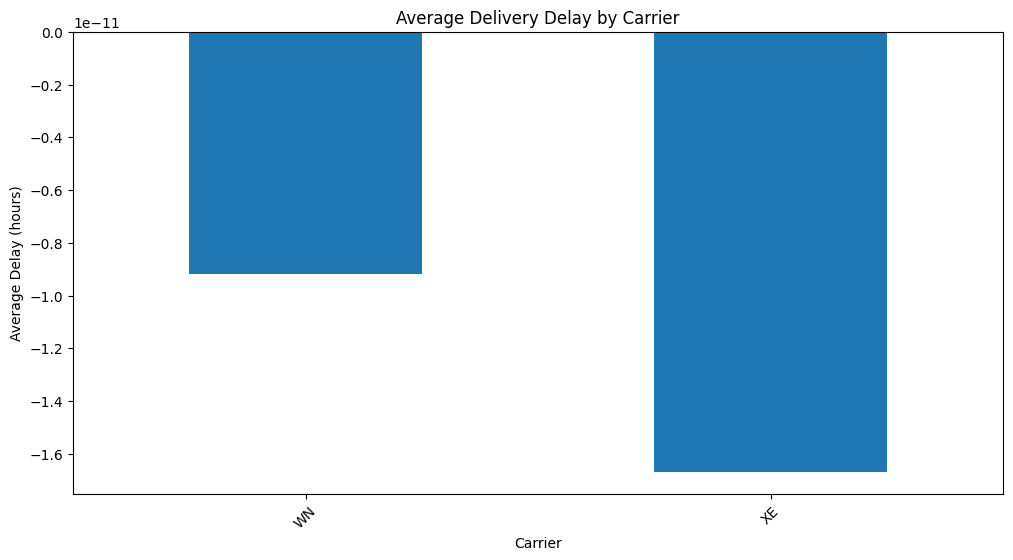

In [9]:
# Carrier performance
carrier_performance = df.groupby('Carrier_Name')['Delivery_Delay'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
carrier_performance.plot(kind='bar')
plt.title('Average Delivery Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay (hours)')
plt.xticks(rotation=45)
plt.show()

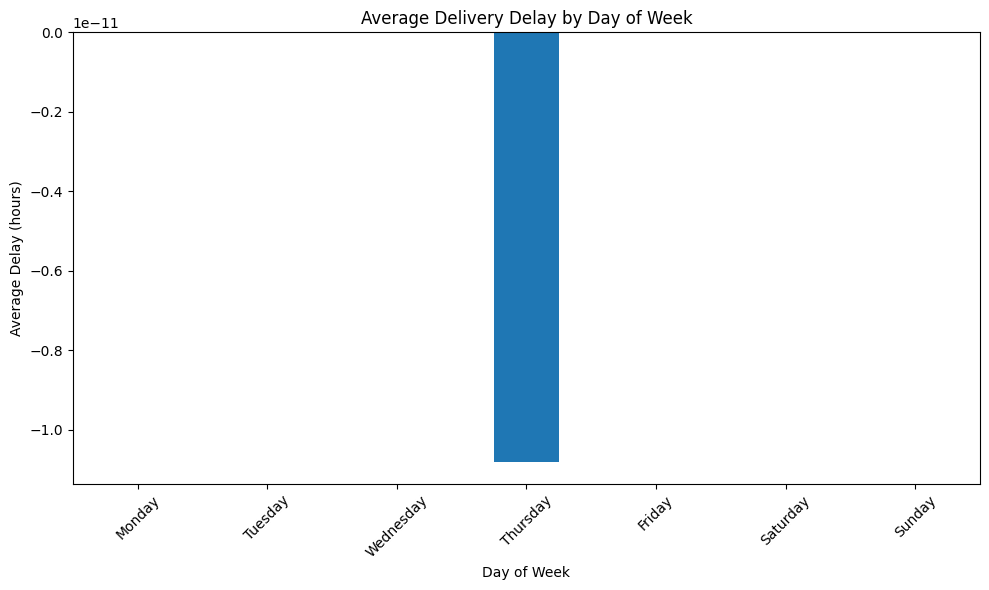

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Actual_Shipment_Time' is a datetime column in your dataframe
# If it's not, you'll need to convert it first:
# df['Actual_Shipment_Time'] = pd.to_datetime(df['Actual_Shipment_Time'])

# Create the DayOfWeek column
df['DayOfWeek'] = df['Actual_Shipment_Time'].dt.day_name()

# Create a categorical type for DayOfWeek to ensure correct ordering
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'],
                                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                 ordered=True)

# Calculate average delay by day of week
day_performance = df.groupby('DayOfWeek')['Delivery_Delay'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
day_performance.plot(kind='bar')
plt.title('Average Delivery Delay by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (hours)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [12]:
# Top 10 routes with highest average delay
top_routes = df.groupby(['Source', 'Destination'])['Delivery_Delay'].mean().sort_values(ascending=False).head(10)
print("Top 10 Routes with Highest Average Delay:")
print(top_routes)

Top 10 Routes with Highest Average Delay:
Source  Destination
IAH     DCA            6.117500e-10
LAS     BUF            5.471839e-10
        BDL            5.468103e-10
        SDF            5.404310e-10
        MHT            5.351820e-10
        TPA            5.038793e-10
        ALB            4.985536e-10
        IND            2.243534e-10
        PHL            2.191766e-10
        PIT            2.130556e-10
Name: Delivery_Delay, dtype: float64


Correlation between Distance and Delivery Delay: 0.03


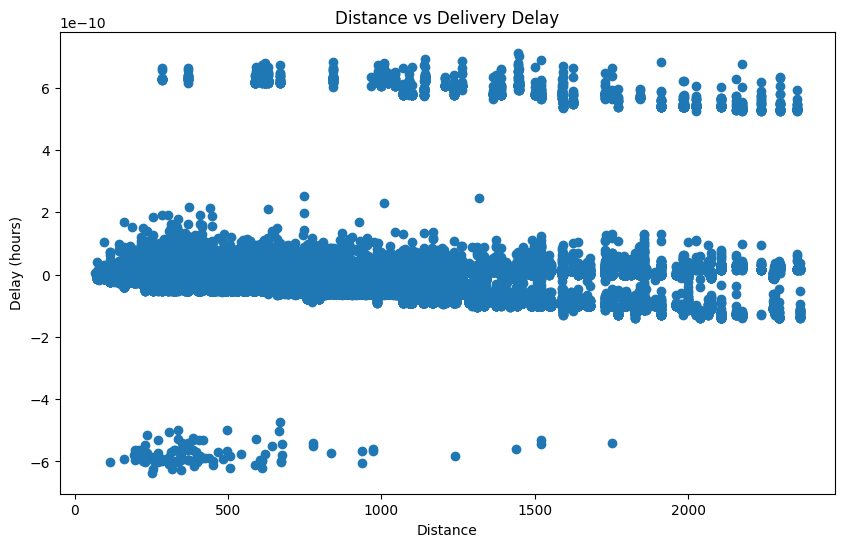

In [13]:
# Correlation between distance and delay
correlation = df['Distance'].corr(df['Delivery_Delay'])
print(f"Correlation between Distance and Delivery Delay: {correlation:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Delivery_Delay'])
plt.title('Distance vs Delivery Delay')
plt.xlabel('Distance')
plt.ylabel('Delay (hours)')
plt.show()

In [17]:
# Print the column names
print("Columns in the dataframe:")
print(df.columns)

# Print the first few rows of the dataframe
print("\nFirst few rows of the dataframe:")
print(df.head())

# Print data types of the columns
print("\nData types of the columns:")
print(df.dtypes)

Columns in the dataframe:
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status', 'Actual_Delivery_Time',
       'Delivery_Delay', 'YearMonth'],
      dtype='object')

First few rows of the dataframe:
   Year  Month  DayofMonth DayOfWeek          Actual_Shipment_Time  \
0  2008      1           3  Thursday 1970-01-01 00:00:00.000002003   
1  2008      1           3  Thursday 1970-01-01 00:00:00.000000754   
2  2008      1           3  Thursday 1970-01-01 00:00:00.000000628   
3  2008      1           3  Thursday 1970-01-01 00:00:00.000000926   
4  2008      1           3  Thursday 1970-01-01 00:00:00.000001829   

          Planned_Shipment_Time         Planned_Delivery_Time Carrier_Name  \
0 1970-01-01 00:00:00.000001955 1970-01-01 00:00:00.000002225           WN   
1 1

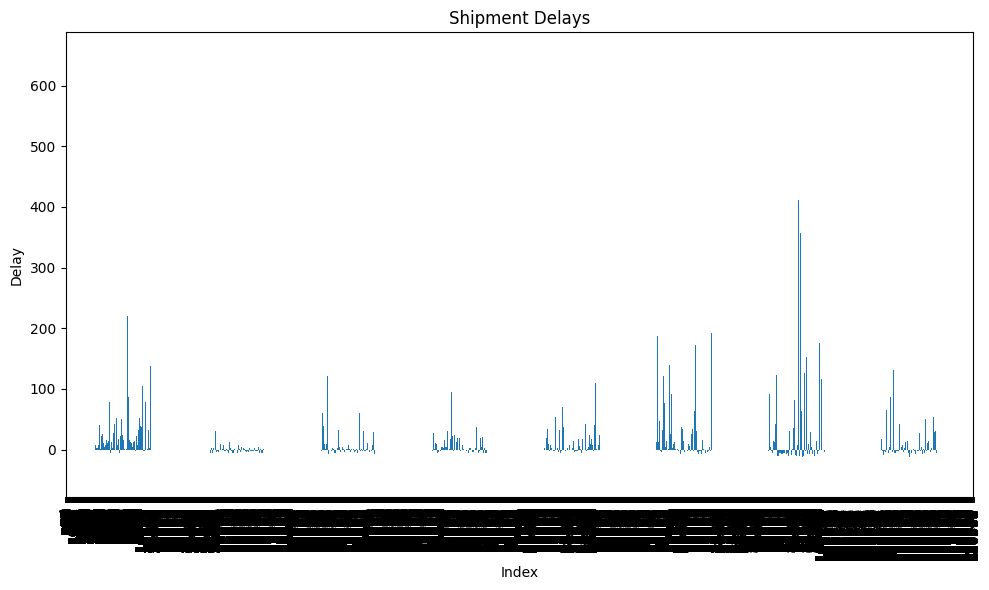

In [18]:
# Assuming 'Shipment_Delay' is a numeric column in your dataframe
# Replace 'Shipment_Delay' with any numeric column name from your dataframe
plt.figure(figsize=(10, 6))
df['Shipment_Delay'].plot(kind='bar')
plt.title('Shipment Delays')
plt.xlabel('Index')
plt.ylabel('Delay')
plt.tight_layout()
plt.show()